In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split

### Importing libraries

#### Loading and Displaying Dataset using pandas

In [2]:
dataset=pd.read_csv("./dataset.csv")

In [3]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### this is a classification problem where the output will be a categorical form

#### Finding Crop Dataset details and information

In [4]:
dataset.shape

(2200, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Exploring Dataset

In [9]:
corr = dataset.corr(numeric_only=True)
corr


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

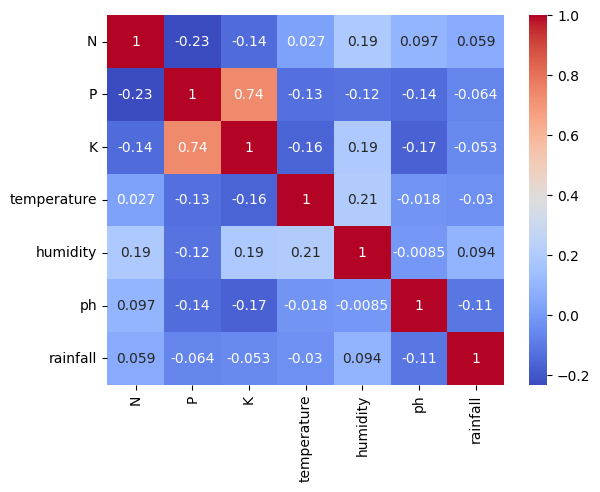

In [10]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [11]:
dataset['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

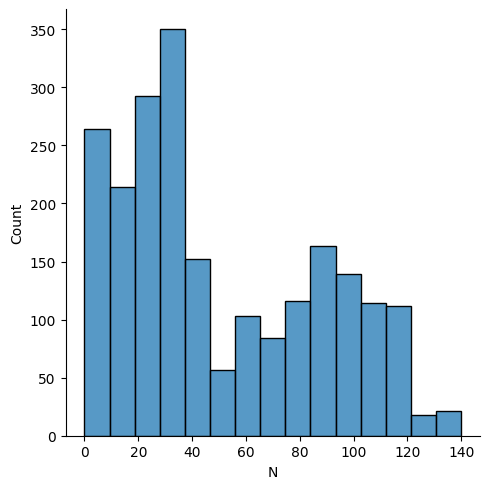

In [12]:
sns.displot(dataset['N'])

#### Converting Categorical varibales to a integer format

In [13]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
dataset['crop_num']=dataset['label'].map(crop_dict)

In [14]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


#### Removing Label column from the dataset

In [15]:
dataset=dataset.drop('label',axis=1)

### Training , Testing and Splitting Dataset

In [16]:
X=dataset.drop('crop_num',axis=1)
Y=dataset['crop_num']

In [17]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [18]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

### Model Building

In [36]:
X = dataset.drop('crop_num', axis=1)
Y = dataset['crop_num']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1760, 7), (440, 7))

### Sample Predictions

In [27]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


#### Importing all the classification models

#### Creating an Instance for building all models at once

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")

C:\Users\SHASHWATH\Downloads\AGRI.AI-main\venv310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9454545454545454
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9613636363636363
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9886363636363636
AdaBoost  with accuracy : 0.14545454545454545
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.8977272727272727


In [ ]:
### From the Above Accuracies, We have adopt Random Forest as it has Maximum Accuracy

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)

In [ ]:
accuracy_score(Y_test,ypred)*100

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = rfc.predict(features).reshape(1,-1)
    
    return prediction[0] 

In [ ]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [40]:
# ======== Model Building for Crop Recommendation ========
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# CSV file name (change here if needed later)
csv_file = "dataset.csv"

# Load dataset
dataset = pd.read_csv(csv_file)

# Features (X) and Target (Y)
X = dataset.drop('crop_num', axis=1)  # all features except target
Y = dataset['crop_num']               # target column

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, Y_train)

# Save model as croprecommender.pkl
with open("croprecommender.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained & saved as croprecommender.pkl")


KeyError: "['crop_num'] not found in axis"

In [41]:
# ======== Model Building for Crop Recommendation ========
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# CSV file name (change here if needed later)
csv_file = "dataset.csv"

# Load dataset
dataset = pd.read_csv(csv_file)

# Features (X) and Target (Y)
X = dataset.drop('crop_num', axis=1)  # all features except target
Y = dataset['crop_num']               # target column

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, Y_train)

# Save model as croprecommender.pkl
with open("croprecommender.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained & saved as croprecommender.pkl")


KeyError: "['crop_num'] not found in axis"

In [42]:
# ======== Model Building for Crop Recommendation ========
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# CSV file name
csv_file = "dataset.csv"

# Load dataset
dataset = pd.read_csv(csv_file)

print("Columns in dataset:", dataset.columns.tolist())  # Debugging line

# Target column name (last column in dataset)
target_column = dataset.columns[-1]

# Features (X) and Target (Y)
X = dataset.drop(target_column, axis=1)  
Y = dataset[target_column]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, Y_train)

# Save model as croprecommender.pkl
with open("croprecommender.pkl", "wb") as f:
    pickle.dump(model, f)

print(f"✅ Model trained & saved as croprecommender.pkl (Target column: {target_column})")


Columns in dataset: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
Training set shape: (1760, 7), Test set shape: (440, 7)
✅ Model trained & saved as croprecommender.pkl (Target column: label)


In [43]:
import pickle
import numpy as np

# Load the trained model from ML_MODEL folder
with open("ML_MODEL/croprecommender.pkl", "rb") as f:
    model = pickle.load(f)

# Example input (N, P, K, temperature, humidity, ph, rainfall)
sample_input = np.array([[90, 42, 43, 20.8, 82, 6.5, 202]])

# Predict crop
prediction = model.predict(sample_input)
print("🌱 Recommended crop:", prediction[0])


FileNotFoundError: [Errno 2] No such file or directory: 'ML_MODEL/croprecommender.pkl'

In [44]:
import pickle
import numpy as np

# Full path to your model file
with open(r"C:\Users\YourName\Downloads\AGRI.AI-main\ML_MODEL\croprecommender.pkl", "rb") as f:
    model = pickle.load(f)

# Example input
sample_input = np.array([[90, 42, 43, 20.8, 82, 6.5, 202]])
prediction = model.predict(sample_input)
print("🌱 Recommended crop:", prediction[0])


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\YourName\\Downloads\\AGRI.AI-main\\ML_MODEL\\croprecommender.pkl'

In [45]:
import os
os.chdir(r"C:\Users\SHASHWATH\Downloads\AGRI.AI-main")


In [46]:
import pickle
import numpy as np

# Full path to your model file
with open(r"C:\Users\SHASHWATH\Downloads\AGRI.AI-main\ML_MODEL\croprecommender.pkl", "rb") as f:
    model = pickle.load(f)

# Example input
sample_input = np.array([[90, 42, 43, 20.8, 82, 6.5, 202]])
prediction = model.predict(sample_input)
print("🌱 Recommended crop:", prediction[0])


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\SHASHWATH\\Downloads\\AGRI.AI-main\\ML_MODEL\\croprecommender.pkl'

In [47]:
import pickle
import numpy as np

# Load the trained model using full path
with open(r"C:\Users\SHASHWATH\Downloads\AGRI.AI-main\AGRI.AI-main\ML_MODEL\croprecommender.pkl", "rb") as f:
    model = pickle.load(f)

# Example input in order: [N, P, K, temperature, humidity, ph, rainfall]
sample_input = np.array([[90, 42, 43, 20.8, 82, 6.5, 202]])

# Predict crop
prediction = model.predict(sample_input)
print("🌱 Recommended crop:", prediction[0])


🌱 Recommended crop: rice


C:\Users\SHASHWATH\Downloads\AGRI.AI-main\venv310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
import pickle
import pandas as pd

# Load model
with open(r"C:\Users\SHASHWATH\Downloads\AGRI.AI-main\AGRI.AI-main\ML_MODEL\croprecommender.pkl", "rb") as f:
    model = pickle.load(f)

# Example input as DataFrame
sample_input = pd.DataFrame([{
    'N': 90,
    'P': 42,
    'K': 43,
    'temperature': 20.8,
    'humidity': 82,
    'ph': 6.5,
    'rainfall': 202
}])

# Predict
prediction = model.predict(sample_input)
print("🌱 Recommended crop:", prediction[0])


🌱 Recommended crop: rice


In [4]:
import pickle
import numpy as np

# Load model
with open("croprecommender.pkl", "rb") as f:
    model = pickle.load(f)

# Test inputs
test_inputs = [
    [90, 42, 43, 20, 80, 6.5, 200],  # High NPK, moderate temp/humidity
    [20, 10, 10, 35, 40, 7.0, 50],   # Dry climate, low rainfall
    [50, 50, 50, 15, 90, 6.0, 300],  # Wet climate, high humidity
]

# Run predictions
for features in test_inputs:
    pred = model.predict(np.array(features).reshape(1, -1))
    print(features, "→", pred)


[90, 42, 43, 20, 80, 6.5, 200] → ['rice']
[20, 10, 10, 35, 40, 7.0, 50] → ['mothbeans']
[50, 50, 50, 15, 90, 6.0, 300] → ['papaya']


C:\Users\SHASHWATH\Downloads\AGRI.AI-main\venv310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SHASHWATH\Downloads\AGRI.AI-main\venv310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SHASHWATH\Downloads\AGRI.AI-main\venv310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [5]:
import requests

data = {
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature": 20,
    "humidity": 80,
    "ph": 6.5,
    "rainfall": 200
}
res = requests.post("http://127.0.0.1:8000/predict", json=data)
print(res.json())


{'raw_prediction': 'rice', 'mapped_crop_name': 'rice', 'result': 'rice is the best crop to be cultivated right there'}


In [6]:
import requests

# Test input for Mango (example values)
data = {
    "N": 40,
    "P": 40,
    "K": 38,
    "temperature": 30,
    "humidity": 50,
    "ph": 6.0,
    "rainfall": 150
}

res = requests.post("http://127.0.0.1:8000/predict", json=data)
print(res.json())


{'raw_prediction': 'mango', 'mapped_crop_name': 'mango', 'result': 'mango is the best crop to be cultivated right there'}


In [1]:
import requests

BASE_URL = "http://127.0.0.1:8000"

# 🔍 Check API health
print("🔍 Checking API health...")
print(requests.get(BASE_URL).json())

# 🌱 Test Crop Prediction
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,
    "Rainfall": 200
}

print("\n🌱 Testing Crop Prediction...")
res = requests.post(f"{BASE_URL}/predict-crop", json=crop_payload)
print("Crop Prediction Response:", res.json())


🔍 Checking API health...
{'message': '🌱 Crop & Fertilizer Prediction API is running!'}

🌱 Testing Crop Prediction...
Crop Prediction Response: {'result': 'Recommended Crop: Unknown Crop'}


In [2]:
import requests

BASE_URL = "http://127.0.0.1:8000"

# Test 1: Check if API is running
print("🔍 Checking API health...")
resp = requests.get(BASE_URL)
print(resp.json())

# Test 2: Crop Prediction
print("\n🌱 Testing Crop Prediction...")
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,  # Make sure 'ph' is lowercase to match CROP model
    "Rainfall": 200
}
resp = requests.post(f"{BASE_URL}/predict-crop", json=crop_payload)
print("Crop Prediction Response:", resp.json())


🔍 Checking API health...
{'message': '🌱 Crop & Fertilizer Prediction API is running!'}

🌱 Testing Crop Prediction...
Crop Prediction Response: {'result': 'Recommended Crop: Rice'}


In [3]:
import requests

BASE_URL = "http://127.0.0.1:8000"

# Test 1: Check API health
print("🔍 Checking API health...")
resp = requests.get(BASE_URL)
print(resp.json())

# Test 2: Crop Prediction
print("\n🌱 Testing Crop Prediction...")
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,  # Make sure it's lowercase 'ph' to match your Pydantic model
    "Rainfall": 200
}
resp = requests.post(f"{BASE_URL}/predict-crop", json=crop_payload)
print("Crop Prediction Response:", resp.json())


🔍 Checking API health...


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002E2EDD7F700>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [4]:
import requests

BASE_URL = "http://127.0.0.1:8000"

# Test 1: Check API health
print("🔍 Checking API health...")
resp = requests.get(BASE_URL)
print(resp.json())

# Test 2: Crop Prediction
print("\n🌱 Testing Crop Prediction...")
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,  # Make sure it's lowercase 'ph' to match your Pydantic model
    "Rainfall": 200
}
resp = requests.post(f"{BASE_URL}/predict-crop", json=crop_payload)
print("Crop Prediction Response:", resp.json())


🔍 Checking API health...
{'message': '🌱 Crop & Fertilizer Prediction API is running!'}

🌱 Testing Crop Prediction...
Crop Prediction Response: {'result': 'Recommended Crop: Rice'}


In [1]:
print("Unique labels:", dataset['label'].unique())


NameError: name 'dataset' is not defined

In [2]:
import pandas as pd

dataset = pd.read_csv("dataset.csv")
print("Unique labels:", dataset['label'].unique())


FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [3]:
import pandas as pd

dataset = pd.read_csv("../data/dataset.csv")   # go up one folder, then into data/
print("Unique labels:", dataset['label'].unique())


Unique labels: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [4]:
# test_api.py
import requests

BASE_URL = "http://127.0.0.1:8000"

# ---------- Test 1: API Health ----------
print("🔍 Checking API health...")
resp = requests.get(BASE_URL)
print("Health Response:", resp.json())


# ---------- Test 2: Crop Prediction ----------
print("\n🌱 Testing Crop Prediction...")
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,   # must be lowercase as in CROP schema
    "Rainfall": 200
}
resp = requests.post(f"{BASE_URL}/predict-crop", json=crop_payload)
print("Crop Prediction Response:", resp.json())


# ---------- Test 3: Fertilizer Prediction ----------
print("\n💧 Testing Fertilizer Prediction...")
fert_payload = {
    "Temparature": 25,   # spelling must match your dataset/schema
    "Humidity": 80,
    "Moisture": 30,
    "Soil_Type": "Sandy",
    "Crop_Type": "Maize",
    "Nitrogen": 90,
    "Potassium": 40,
    "Phosphorous": 40
}
resp = requests.post(f"{BASE_URL}/predict-fertilizer", json=fert_payload)
print("Fertilizer Prediction Response:", resp.json())


🔍 Checking API health...
Health Response: {'message': '🌱 Crop & Fertilizer Prediction API is running!'}

🌱 Testing Crop Prediction...
Crop Prediction Response: {'detail': [{'type': 'missing', 'loc': ['body', 'temperature'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'Temperature': 25, 'Humidity': 80, 'ph': 6.5, 'Rainfall': 200}}, {'type': 'missing', 'loc': ['body', 'humidity'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'Temperature': 25, 'Humidity': 80, 'ph': 6.5, 'Rainfall': 200}}, {'type': 'missing', 'loc': ['body', 'rainfall'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'Temperature': 25, 'Humidity': 80, 'ph': 6.5, 'Rainfall': 200}}]}

💧 Testing Fertilizer Prediction...
Fertilizer Prediction Response: {'fertilizer': '10-26-26', 'message': '10-26-26 is the best Fertilizer to use.'}


In [4]:
# test_api.py
import requests

BASE_URL = "http://127.0.0.1:8000"

# ---------- Test 1: API Health ----------
print("🔍 Checking API health...")
resp = requests.get(BASE_URL)
print("Health Response:", resp.json())


# ---------- Test 2: Crop Prediction ----------
print("\n🌱 Testing Crop Prediction...")
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,   # must be lowercase as in CROP schema
    "Rainfall": 200
}
resp = requests.post(f"{BASE_URL}/predict-crop", json=crop_payload)
print("Crop Prediction Response:", resp.json())


# ---------- Test 3: Fertilizer Prediction ----------
print("\n💧 Testing Fertilizer Prediction...")
fert_payload = {
    "Temparature": 25,   # spelling must match your dataset/schema
    "Humidity": 80,
    "Moisture": 30,
    "Soil_Type": "Sandy",
    "Crop_Type": "Maize",
    "Nitrogen": 90,
    "Potassium": 40,
    "Phosphorous": 40
}
resp = requests.post(f"{BASE_URL}/predict-fertilizer", json=fert_payload)
print("Fertilizer Prediction Response:", resp.json())


🔍 Checking API health...
Health Response: {'message': '🌱 Crop & Fertilizer Prediction API is running!'}

🌱 Testing Crop Prediction...
Crop Prediction Response: {'detail': [{'type': 'missing', 'loc': ['body', 'temperature'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'Temperature': 25, 'Humidity': 80, 'ph': 6.5, 'Rainfall': 200}}, {'type': 'missing', 'loc': ['body', 'humidity'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'Temperature': 25, 'Humidity': 80, 'ph': 6.5, 'Rainfall': 200}}, {'type': 'missing', 'loc': ['body', 'rainfall'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'Temperature': 25, 'Humidity': 80, 'ph': 6.5, 'Rainfall': 200}}]}

💧 Testing Fertilizer Prediction...
Fertilizer Prediction Response: {'fertilizer': '10-26-26', 'message': '10-26-26 is the best Fertilizer to use.'}


In [5]:
# test_api.py
import requests

BASE_URL = "http://127.0.0.1:8000"

def safe_request(method, url, **kwargs):
    """Helper to handle requests safely."""
    try:
        resp = requests.request(method, url, **kwargs)
        resp.raise_for_status()
        return resp.json()
    except requests.exceptions.ConnectionError:
        return {"error": "❌ Could not connect to API. Is the FastAPI server running?"}
    except requests.exceptions.HTTPError as e:
        return {"error": f"❌ HTTP Error {resp.status_code}: {e}"}
    except Exception as e:
        return {"error": f"❌ Unexpected Error: {str(e)}"}


# ---------- Test 1: API Health ----------
print("🔍 Checking API health...")
print("Health Response:", safe_request("GET", BASE_URL))


# ---------- Test 2: Crop Prediction ----------
print("\n🌱 Testing Crop Prediction...")
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,   # must be lowercase as in CROP schema
    "Rainfall": 200
}
print("Crop Prediction Response:", safe_request("POST", f"{BASE_URL}/predict-crop", json=crop_payload))


# ---------- Test 3: Fertilizer Prediction ----------
print("\n💧 Testing Fertilizer Prediction...")
fert_payload = {
    "Temparature": 25,   # spelling must match your dataset/schema
    "Humidity": 80,
    "Moisture": 30,
    "Soil_Type": "Sandy",
    "Crop_Type": "Maize",
    "Nitrogen": 90,
    "Potassium": 40,
    "Phosphorous": 40
}
print("Fertilizer Prediction Response:", safe_request("POST", f"{BASE_URL}/predict-fertilizer", json=fert_payload))


🔍 Checking API health...
Health Response: {'message': '🌱 Crop & Fertilizer Prediction API is running!'}

🌱 Testing Crop Prediction...
Crop Prediction Response: {'error': '❌ HTTP Error 422: 422 Client Error: Unprocessable Entity for url: http://127.0.0.1:8000/predict-crop'}

💧 Testing Fertilizer Prediction...
Fertilizer Prediction Response: {'fertilizer': '10-26-26', 'message': '10-26-26 is the best Fertilizer to use.'}


In [6]:
import requests, json

BASE_URL = "http://127.0.0.1:8000"

def pretty(res):
    return json.dumps(res, indent=2, ensure_ascii=False)

def safe_request(method, url, **kwargs):
    """Helper to handle requests safely."""
    try:
        resp = requests.request(method, url, **kwargs)
        resp.raise_for_status()
        return resp.json()
    except requests.exceptions.ConnectionError:
        return {"error": "❌ Could not connect to API. Is the FastAPI server running?"}
    except requests.exceptions.HTTPError as e:
        return {"error": f"❌ HTTP Error {resp.status_code}: {e}"}
    except Exception as e:
        return {"error": f"❌ Unexpected Error: {str(e)}"}


# ---------- Test 1: API Health ----------
print("🔍 Checking API health...")
print("Health Response:\n", pretty(safe_request("GET", BASE_URL)))


# ---------- Test 2: Crop Prediction ----------
print("\n🌱 Testing Crop Prediction...")
crop_payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "Temperature": 25,
    "Humidity": 80,
    "ph": 6.5,   # must be lowercase as in CROP schema
    "Rainfall": 200
}
print("Crop Prediction Response:\n", pretty(safe_request("POST", f"{BASE_URL}/predict-crop", json=crop_payload)))


# ---------- Test 3: Fertilizer Prediction ----------
print("\n💧 Testing Fertilizer Prediction...")
fert_payload = {
    "Temparature": 25,   # spelling must match your dataset/schema
    "Humidity": 80,
    "Moisture": 30,
    "Soil_Type": "Sandy",
    "Crop_Type": "Maize",
    "Nitrogen": 90,
    "Potassium": 40,
    "Phosphorous": 40
}
print("Fertilizer Prediction Response:\n", pretty(safe_request("POST", f"{BASE_URL}/predict-fertilizer", json=fert_payload)))


🔍 Checking API health...
Health Response:
 {
  "message": "🌱 Crop & Fertilizer Prediction API is running!"
}

🌱 Testing Crop Prediction...
Crop Prediction Response:
 {
  "error": "❌ HTTP Error 422: 422 Client Error: Unprocessable Entity for url: http://127.0.0.1:8000/predict-crop"
}

💧 Testing Fertilizer Prediction...
Fertilizer Prediction Response:
 {
  "fertilizer": "10-26-26",
  "message": "10-26-26 is the best Fertilizer to use."
}


In [7]:
import requests

# Your API endpoint
url = "http://127.0.0.1:8000/predict-crop"

# Example input values
payload = {
    "N": 90,
    "P": 40,
    "K": 40,
    "temperature": 25,
    "humidity": 70,
    "ph": 6.5,
    "rainfall": 200
}

response = requests.post(url, json=payload)

print("Status Code:", response.status_code)
print("Response JSON:", response.json())


Status Code: 422
Response JSON: {'detail': [{'type': 'missing', 'loc': ['body', 'Temperature'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'temperature': 25, 'humidity': 70, 'ph': 6.5, 'rainfall': 200}}, {'type': 'missing', 'loc': ['body', 'Humidity'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'temperature': 25, 'humidity': 70, 'ph': 6.5, 'rainfall': 200}}, {'type': 'missing', 'loc': ['body', 'Rainfall'], 'msg': 'Field required', 'input': {'N': 90, 'P': 40, 'K': 40, 'temperature': 25, 'humidity': 70, 'ph': 6.5, 'rainfall': 200}}]}


In [8]:
# 📌 Crop Recommendation Training

import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Load dataset
df = pd.read_csv("../data/dataset.csv")
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

# 2️⃣ Features (X) and Target (y)
X = df.drop("label", axis=1)   # all except crop name
y = df["label"]                # crop name

# 3️⃣ Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5️⃣ Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# 6️⃣ Save model
with open("../API/croprecommender.pkl", "wb") as f:
    pickle.dump(model, f)

print("🎉 Crop Model saved as croprecommender.pkl")


Dataset Shape: (2200, 8)
Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
✅ Accuracy: 0.9931818181818182
🎉 Crop Model saved as croprecommender.pkl
